## Data science Assignmet 1
#### submitted by - vidhika jain


### Loading the necessary library for linear model and k-fold cross validation

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('C:\\Users\\admin\\OneDrive\\Documents\\GitHub\\DAV-6150\\k-fold\\M2_Data.csv')
#reading the data from the given assignment 

In [7]:
df.head() 
#the given data in not correct as it is missing headers

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [150]:
url0 = "https://github.com/vidhika-git/DAV-6150.git"

# Reading Data via pd.read_csv
df = pd.read_csv(url0)


ParserError: Error tokenizing data. C error: Expected 1 fields in line 39, saw 9


if the above code is showing error (because data is loaded from local machine) run the code from below

In [8]:
pip install ucimlrepo
#using ucimlrepo library to get the data from the given source

SyntaxError: invalid syntax (677309791.py, line 1)

## loading the data from source

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

#this above code to get the data from the website was given on the website 
# Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [10]:
X.head()  #quick look at the data structure 

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


## EDA of data

In [11]:
X.shape

(205, 25)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

The curb-weight variable will serve as the response variable for your regression
model. The explanatory variables you may choose from are as follows: height, width, length, wheel-base,
engine-size, horsepower, peak-rpm, and city-mpg. All other attributes contained within the data set should
be ignored for this Assignment     

since we have to ignore the most of the variable in the dataset we will be focusing on the following variables 
height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg

In [13]:
X.isnull().sum()    #only horse power and peak-rpm has 2 missing value

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [14]:
X[['curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']].describe()

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,203.000000,205.000000
mean,2555.565854,53.724878,65.907805,174.049268,98.756585,126.907317,104.256158,5125.369458,25.219512
std,520.680204,2.443522,2.145204,12.337289,6.021776,41.642693,39.714369,479.334560,6.542142
min,1488.000000,47.800000,60.300000,141.100000,86.600000,61.000000,48.000000,4150.000000,13.000000
25%,2145.000000,52.000000,64.100000,166.300000,94.500000,97.000000,70.000000,4800.000000,19.000000
50%,2414.000000,54.100000,65.500000,173.200000,97.000000,120.000000,95.000000,5200.000000,24.000000
75%,2935.000000,55.500000,66.900000,183.100000,102.400000,141.000000,116.000000,5500.000000,30.000000
max,4066.000000,59.800000,72.300000,208.100000,120.900000,326.000000,288.000000,6600.000000,49.000000


In [15]:
df=X[['curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']]

In [16]:
df   #we will use this data set for buildilng machine learning model.

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,2548,48.8,64.1,168.8,88.6,130,111.0,5000.0,21
1,2548,48.8,64.1,168.8,88.6,130,111.0,5000.0,21
2,2823,52.4,65.5,171.2,94.5,152,154.0,5000.0,19
3,2337,54.3,66.2,176.6,99.8,109,102.0,5500.0,24
4,2824,54.3,66.4,176.6,99.4,136,115.0,5500.0,18
...,...,...,...,...,...,...,...,...,...
200,2952,55.5,68.9,188.8,109.1,141,114.0,5400.0,23
201,3049,55.5,68.8,188.8,109.1,141,160.0,5300.0,19
202,3012,55.5,68.9,188.8,109.1,173,134.0,5500.0,18
203,3217,55.5,68.9,188.8,109.1,145,106.0,4800.0,26


In [17]:
df[df['horsepower'].isna()]   #since missing value are very less we will replace the value with meann value.   

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
130,2579,55.2,66.5,181.5,96.1,132,NaN,NaN,23
131,2460,50.5,66.6,176.8,96.1,132,NaN,NaN,23


In [18]:
import math
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())

C:\Users\admin\AppData\Local\Temp\ipykernel_21264\3819797331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
C:\Users\admin\AppData\Local\Temp\ipykernel_21264\3819797331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())


In [19]:
df[df['horsepower'].isna()]        #now dataset has no missing values

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg


### Visualizing the data for better understanding


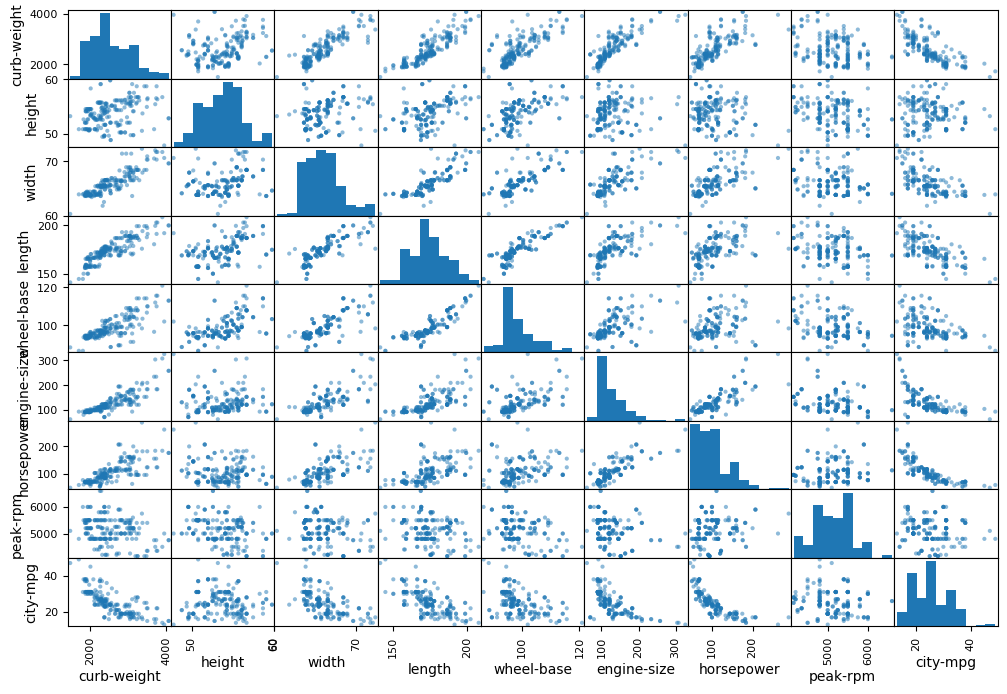

In [20]:
from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms",
             # "housing_median_age"]
scatter_matrix(df, figsize=(12, 8))
#save_fig("scatter_matrix_plot")
plt.show()

After looking the scatter plot we can clearly see the relationship between the explanatory variables and the curb-weight
-width and curb weight tend to show a  positive linear relationship with less scatter around the graph
-peak-rpm is scatter and is difficult to draw a regressing line in that
-we can observe strong negative relationship between city-mpg and curb-weight

In [21]:
df.corr() #checking the coorelation between variable to decide the input variable to choose

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
curb-weight,1.000000,0.295572,0.867032,0.877728,0.776386,0.850594,0.750968,-0.266283,-0.757414
height,0.295572,1.000000,0.279210,0.491029,0.589435,0.067149,-0.110137,-0.320602,-0.048640
width,0.867032,0.279210,1.000000,0.841118,0.795144,0.735433,0.642195,-0.219859,-0.642704
length,0.877728,0.491029,0.841118,1.000000,0.874587,0.683360,0.554434,-0.287031,-0.670909
wheel-base,0.776386,0.589435,0.795144,0.874587,1.000000,0.569329,0.351957,-0.360704,-0.470414
engine-size,0.850594,0.067149,0.735433,0.683360,0.569329,1.000000,0.810713,-0.244599,-0.653658
horsepower,0.750968,-0.110137,0.642195,0.554434,0.351957,0.810713,1.000000,0.130971,-0.803162
peak-rpm,-0.266283,-0.320602,-0.219859,-0.287031,-0.360704,-0.244599,0.130971,1.000000,-0.113723
city-mpg,-0.757414,-0.048640,-0.642704,-0.670909,-0.470414,-0.653658,-0.803162,-0.113723,1.000000


Height has a weak relationship with curb-weight whereas width, length have a strong relationship 
city-mpg has nagative relation with weight

<Axes: >

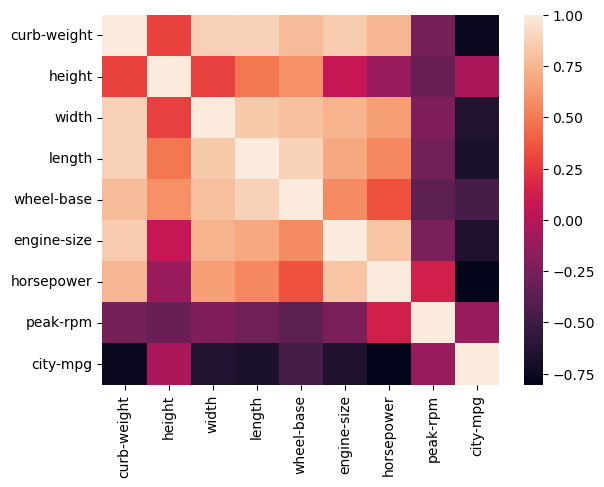

In [22]:
sns.heatmap(df.corr())    #graphical representation of the relationship makes it easier and quick to understand 

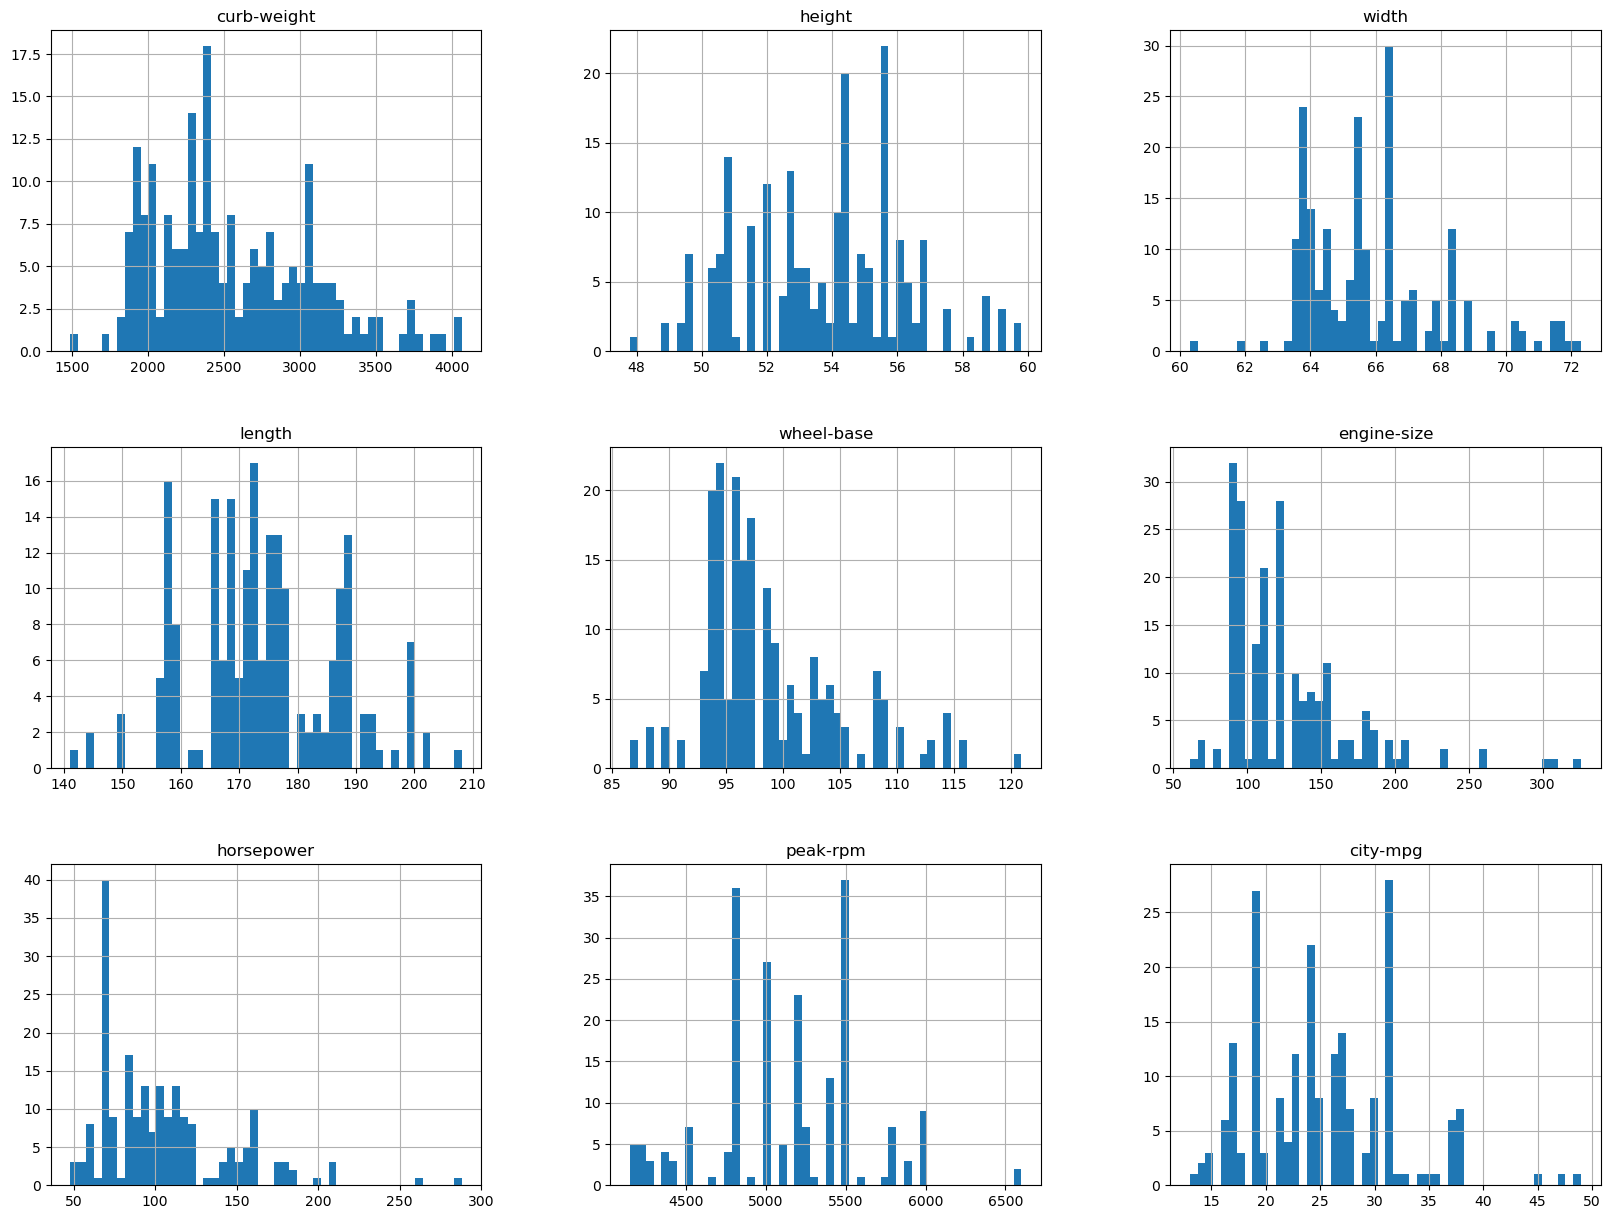

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

we can clearly see the formation of data through this graph, 
-height data has varied values amd most number of values lies between 52-58 , so it is a 
good explanotory variable to choose to explain the data well
-peak-rpm data is not that spread and most values are at only 2 point so this dosent seem a good explanatory variable.

## selection of explanatory variable , building model and k-fold validation

In [127]:
#selecting the features for model 1 and model 2

M1f=np.array(df[['width','length','wheel-base','engine-size','horsepower']])   #


#based om the above eda we have decided to makde two models with M1f as explanatory variable.
#width lenght has a strong relationship with weight , wheel base and engine size is also seem good variable for model


In [128]:
#selecting the target variable of the model
y=df['curb-weight']

In [129]:
#split the data set into train and test for model 1

x_train, x_test, y_train ,y_test =train_test_split(M1f,y,test_size=0.2)

In [130]:
#preparing the model
from sklearn import linear_model
reg=linear_model.LinearRegression()
model1=reg.fit(x_train,y_train)


In [131]:
#prediction 
from sklearn.model_selection import cross_val_predict

In [132]:
pred=cross_val_predict(model1,x_test,y_test)
pred

array([3009.99768865, 3518.98344138, 3120.1115487 , 2015.9653938 ,
       3280.94326541, 1169.78721729, 2045.46844529, 2295.20274668,
       2659.2539756 , 2362.0291377 , 2423.12772419, 3142.66652555,
       2752.36133085, 3260.06360293, 2690.42437562, 2421.75320882,
       1975.388889  , 1998.00020443, 2455.80409282, 3439.53784004,
       2065.45774893, 3019.17219678, 2407.26067771, 2860.20480915,
       3101.39721235, 2048.96929505, 2277.55674841, 2053.28126804,
       2149.81392718, 2931.50861977, 1975.70072341, 2638.22807859,
       1982.77713595, 2718.98846976, 3940.90815562, 2774.33001957,
       3251.67447707, 1959.79654898, 2937.63013177, 3201.88825388,
       2650.14294322])

In [133]:
#k-fold cross validation
#importing the cross_val_score function
from sklearn.model_selection import cross_val_score

In [134]:
#10 fold cross validation on test data set
test_score1=cross_val_score(model1, x_test,y_test,cv=10)
test_score1

array([0.95451013, 0.80714212, 0.8129651 , 0.94508825, 0.95420306,
       0.83997158, 0.72630654, 0.98020282, 0.44210823, 0.94921048])

In [135]:
#the average score
print(np.mean(test_score1))

0.8411708306334257


In [ ]:
#selection of variable for model 2
M2f=np.array(df[['width','length','engine-size','city-mpg']])


In [141]:
#split the data set into train and test for model 2

x_train2, x_test2, y_train2 ,y_test2 =train_test_split(M2f,y,test_size=0.2)

In [142]:
model2=reg.fit(x_train2,y_train2)    #fitting the model

In [143]:
pred2=cross_val_predict(model2,x_test2,y_test2)
pred2

array([1879.54762542, 3150.61287087, 1905.00044842, 2931.86060031,
       2117.16708505, 2457.6920553 , 3004.99968688, 1773.95551575,
       2210.57446481, 2491.62171584, 2148.30049411, 2687.24616047,
       2467.76159227, 3332.55876252, 1892.06603063, 2854.43132479,
       2754.02558325, 2547.64985227, 2730.22190256, 2473.57948866,
       2703.28711561, 2959.85854202, 2406.52789484, 2041.07757615,
       2737.23175312, 2983.96585944, 2705.28980688, 2437.00399997,
       2141.04635715, 2774.80884156, 2930.60988621, 2033.39516637,
       1993.67697818, 2399.276385  , 2738.41293086, 2141.27748967,
       2318.88291829, 2551.71746421, 4483.02455147, 2166.86500196,
       2080.6783291 ])

In [144]:
#10 fold cross validation on test data set
test_score2=cross_val_score(model2, x_test2,y_test2,cv=10)
test_score2

array([ 0.94044437,  0.97388088,  0.74796289,  0.88922917,  0.06705769,
        0.94298675,  0.7930925 ,  0.93266495, -0.01965652,  0.83628807])

In [145]:
#the average score
print(np.mean(test_score2))

0.7103950756132653


In [148]:
print("test score model 1=",np.mean(test_score1))
print("test score model 2=",np.mean(test_score2))

test score model 1= 0.8411708306334257
test score model 2= 0.7103950756132653


from the above result we can clearly see model 1 is better for prediction of curb weight but still there is a scope of improvement in model 1